In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import defaultdict

In [3]:
# configure matplotlib
%matplotlib notebook
# %matplotlib inline

In [4]:
#mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('font',**{'family':'serif'})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [5]:
from cdi.util.stats_utils import load_statistics

from cdi.util.analysis.plotting import plot_comparison, plot_seaborn_comparison
from cdi.util.analysis.logs import collate_stats

## Analysis setup

### Global settings

In [6]:
data_name = 'fa_frey_trunc_processed'
# exp_seed_key = 'm20190508_d20200325_20200406_20200407'
exp_seed_keys = [
    'm20190508_d20200325_20200406_20200407',
#     'm20190508_d2020032511_20200406_20200407',
#     'm20190508_d2020032522_20200406_20200407',
#     'm20190508_d2020032533_20200406_20200407',
#     'm20190508_d2020032544_20200406_20200407',
#     'm20190508_d2020032555_20200406_20200407',
#     'm20190508_d2020032566_20200406_20200407',
#     'm20190508_d2020032577_20200406_20200407',
#     'm20190508_d2020032588_20200406_20200407',
#     'm20190508_d2020032599_20200406_20200407',
]

### Templates

In [7]:
log_path_template = f'../../trained_models/{data_name}/learning_experiments/{{}}/{{}}/{{}}/logs/{{}}'

## Helpers

In [8]:
def read_experiment_stats(group, model, seed, filename):
    path = log_path_template.format(group, model, seed, filename)
    filename = os.path.basename(path)
    dirpath = os.path.dirname(path)
    return load_statistics(dirpath, filename)

def read_experiment_stats_all_seeds(group, model, filename):
    all_stats = defaultdict(list)
    for exp_seed in exp_seed_keys:
        path = log_path_template.format(group, model, exp_seed, filename)
        filename = os.path.basename(path)
        dirpath = os.path.dirname(path)
        stats = load_statistics(dirpath, filename)
        for k, v in stats.items():
            all_stats[k].append(v)
    
    return all_stats

def read_suite_stats_all_seeds(group, suite, filename):
    return {
        name: read_experiment_stats_all_seeds(group, model, filename)
        for name, model in suite.items()
    }

def read_suite_stats(group, suite, filename, seed):
    return {
        name: read_experiment_stats(group, model, seed, filename)
        for name, model in suite.items()
    }

def read_suite_stats_with_init_all_seeds(group, suite):
    stats = {}
    for name, model in suite.items():
        stats[name] = read_experiment_stats_all_seeds(group, model, 'summary.csv')
        # Please ignore this ugliness it just appends the initialisation stats to the experiment stats
        if os.path.exists(log_path_template.format(group, model, exp_seed_keys[0], 'init_summary.csv')):
            init_stats = read_experiment_stats_all_seeds(group, model, 'init_summary.csv')
            stats[name]['init'] = init_stats

    return stats

def read_suite_stats_with_init(group, suite, seed):
    stats = {}
    for name, model in suite.items():
        stats[name] = read_experiment_stats(group, model, seed, 'summary.csv')
        # Please ignore this ugliness it just appends the initialisation stats to the experiment stats
        if os.path.exists(log_path_template.format(group, model, seed, 'init_summary.csv')):
            init_stats = read_experiment_stats(group, model, seed, 'init_summary.csv')
            stats[name]['init'] = init_stats

    return stats

def read_all_suite_stats(groups, suite, filename, seed):
    return {
        group: read_suite_stats(group, suite, filename, seed)
        for group in groups
    }


## Learning curve analysis

### Likelihood analysis


#### All

In [9]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
    'VCDI 1': 'fa_pretrained_svar_cdi',
    'VCDI 2': 'fa_pretrained_svar_cdi_2',
    'VCDI 3': 'fa_pretrained_svar_cdi_3',
    'VCDI 4': 'fa_pretrained_svar_cdi_4',
    'VCDI 5': 'fa_pretrained_svar_cdi_5',
    'VCDI 6': 'fa_pretrained_svar_cdi_6',
    'VCDI 7': 'fa_pretrained_svar_cdi_7',
    'VCDI 8': 'fa_pretrained_svar_cdi_8',
    'VCDI 9': 'fa_pretrained_svar_cdi_9',
    'VCDI 10': 'fa_pretrained_svar_cdi_10',
    'VCDI 11': 'fa_pretrained_svar_cdi_11',
    'VCDI 12': 'fa_pretrained_svar_cdi_12',
    'VCDI 13': 'fa_pretrained_svar_cdi_13',
    'VCDI 14': 'fa_pretrained_svar_cdi_14',
    'VCDI 15': 'fa_pretrained_svar_cdi_15',
    'VCDI 16': 'fa_pretrained_svar_cdi_16',
    'VCDI 17': 'fa_pretrained_svar_cdi_17',
    'VCDI 18': 'fa_pretrained_svar_cdi_18',
    'VCDI 19': 'fa_pretrained_svar_cdi_19',
    'VCDI 20': 'fa_pretrained_svar_cdi_20',
    'VCDI 21': 'fa_pretrained_svar_cdi_21',
#     'VCDI 22': 'fa_pretrained_svar_cdi_22',
    'VCDI 23': 'fa_pretrained_svar_cdi_23',
    'VCDI 24': 'fa_pretrained_svar_cdi_24',
    'VCDI 25': 'fa_pretrained_svar_cdi_25',
    'VCDI 26': 'fa_pretrained_svar_cdi_26',
    'VCDI 27': 'fa_pretrained_svar_cdi_27',
    'VCDI 28': 'fa_pretrained_svar_cdi_28',
    'VCDI 29': 'fa_pretrained_svar_cdi_29',
    'VCDI 30': 'fa_pretrained_svar_cdi_30',
    'VCDI 31': 'fa_pretrained_svar_cdi_31',
}

<IPython.core.display.Javascript object>


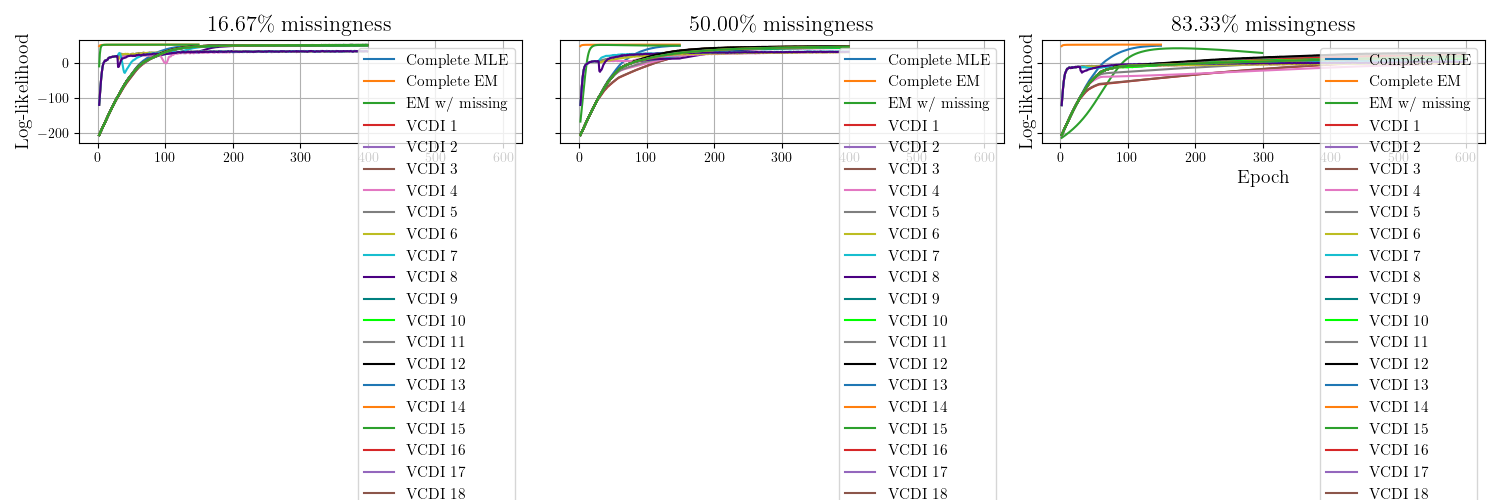

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
                    ylim=None)
#                     ylim=(-19.6, -19.1))
#                     ylim=(0, 10))

# axes[0].set_xlim(left=-5, right=255)
# axes[1].set_xlim(left=-5, right=255)
# axes[2].set_xlim(left=-5, right=255)

fig.tight_layout()

#### Var. learning rate

In [16]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
    'VCDI 2, var\_lr 1e-1': 'fa_pretrained_svar_cdi_2',
    'VCDI 1, var\_lr 1e-2': 'fa_pretrained_svar_cdi',
    'VCDI 3, var\_lr 1e-3': 'fa_pretrained_svar_cdi_3',
    'VCDI 4, var\_lr 1e-4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
#     'VCDI 6': 'fa_pretrained_svar_cdi_6',
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
#     'VCDI 9': 'fa_pretrained_svar_cdi_9',
#     'VCDI 10': 'fa_pretrained_svar_cdi_10',
#     'VCDI 11': 'fa_pretrained_svar_cdi_11',
#     'VCDI 12': 'fa_pretrained_svar_cdi_12',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24': 'fa_pretrained_svar_cdi_24',
#     'VCDI 25': 'fa_pretrained_svar_cdi_25',
#     'VCDI 26': 'fa_pretrained_svar_cdi_26',
#     'VCDI 27': 'fa_pretrained_svar_cdi_27',
#     'VCDI 28': 'fa_pretrained_svar_cdi_28',
}

<IPython.core.display.Javascript object>


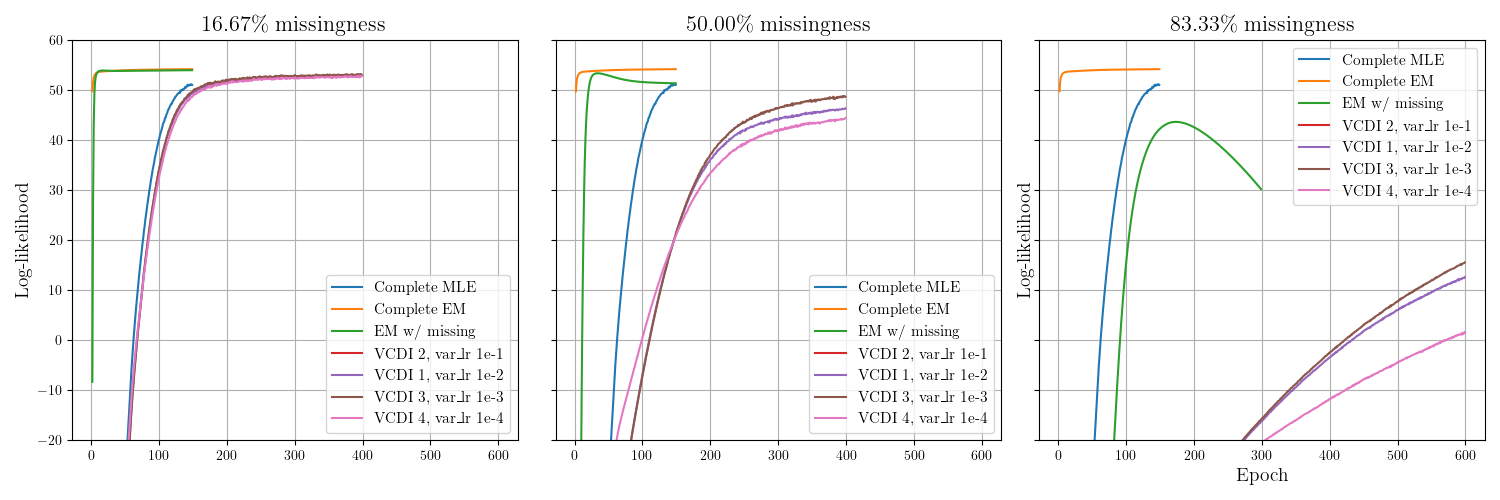

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

# axes[0].set_xlim(left=-5, right=255)
# axes[1].set_xlim(left=-5, right=255)
# axes[2].set_xlim(left=-5, right=255)

fig.tight_layout()

Changing the variational model learning rate only. The same learning rate seems to be best for all \% of missing data.

#### Imputation delay

In [18]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 2': 'fa_pretrained_svar_cdi_2',
    'VCDI 3, delay 20': 'fa_pretrained_svar_cdi_3',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
    'VCDI 5, delay 40': 'fa_pretrained_svar_cdi_5',
    'VCDI 6, delay 80': 'fa_pretrained_svar_cdi_6',
    'VCDI 7, delay 120': 'fa_pretrained_svar_cdi_7',
    'VCDI 8, delay 150': 'fa_pretrained_svar_cdi_8',
#     'VCDI 9': 'fa_pretrained_svar_cdi_9',
#     'VCDI 10': 'fa_pretrained_svar_cdi_10',
#     'VCDI 11': 'fa_pretrained_svar_cdi_11',
#     'VCDI 12': 'fa_pretrained_svar_cdi_12',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24': 'fa_pretrained_svar_cdi_24',
#     'VCDI 25': 'fa_pretrained_svar_cdi_25',
#     'VCDI 26': 'fa_pretrained_svar_cdi_26',
#     'VCDI 27': 'fa_pretrained_svar_cdi_27',
#     'VCDI 28': 'fa_pretrained_svar_cdi_28',
}

<IPython.core.display.Javascript object>


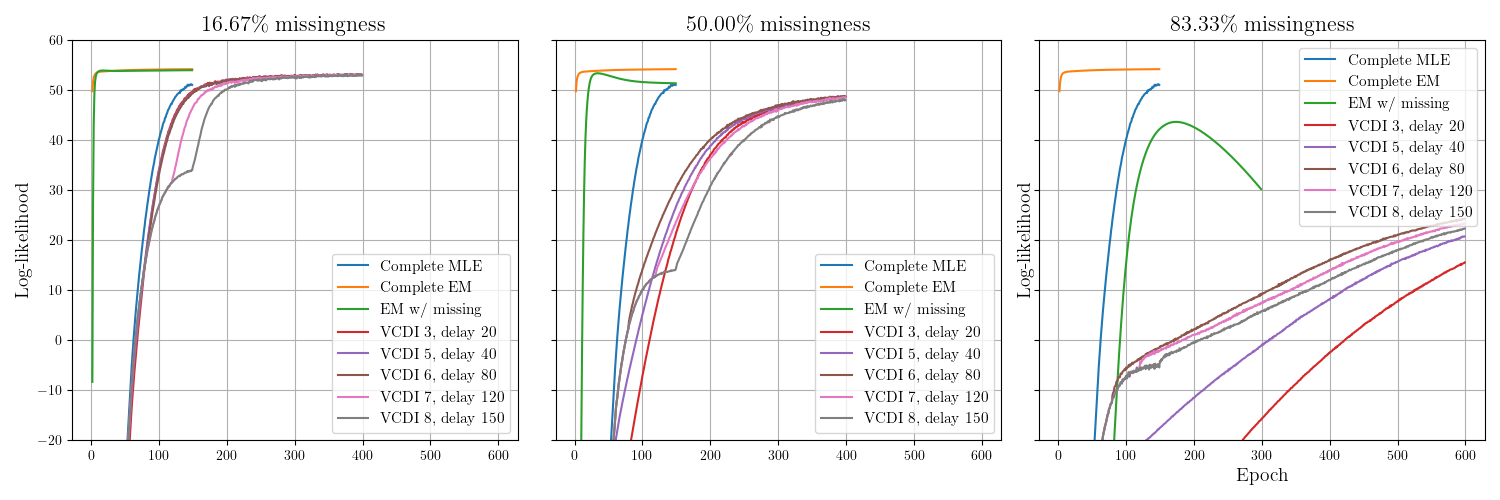

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

# axes[0].set_xlim(left=-5, right=255)
# axes[1].set_xlim(left=-5, right=255)
# axes[2].set_xlim(left=-5, right=255)

fig.tight_layout()

I ran this to check whether this does not cause the double ascent behaviour. Also to check how increasing the delay would affect the learning curve. Here, increasing the delay helps, until some delay, then it starts to degrade. In this case a delay of 80 steps was the best across all \% of missingness (in low missingness the curvature is almost the same for 20,40, and 80).

#### Number of imputation chains (K)

In [33]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 2': 'fa_pretrained_svar_cdi_2',
#     'VCDI 3': 'fa_pretrained_svar_cdi_3',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
    'VCDI 9, K=1': 'fa_pretrained_svar_cdi_9',
    'VCDI 10, K=5': 'fa_pretrained_svar_cdi_10',
    'VCDI 6, K=10': 'fa_pretrained_svar_cdi_6',
#     'VCDI 11': 'fa_pretrained_svar_cdi_11',
#     'VCDI 12': 'fa_pretrained_svar_cdi_12',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24': 'fa_pretrained_svar_cdi_24',
#     'VCDI 25': 'fa_pretrained_svar_cdi_25',
#     'VCDI 26': 'fa_pretrained_svar_cdi_26',
#     'VCDI 27': 'fa_pretrained_svar_cdi_27',
#     'VCDI 28': 'fa_pretrained_svar_cdi_28',
}

<IPython.core.display.Javascript object>


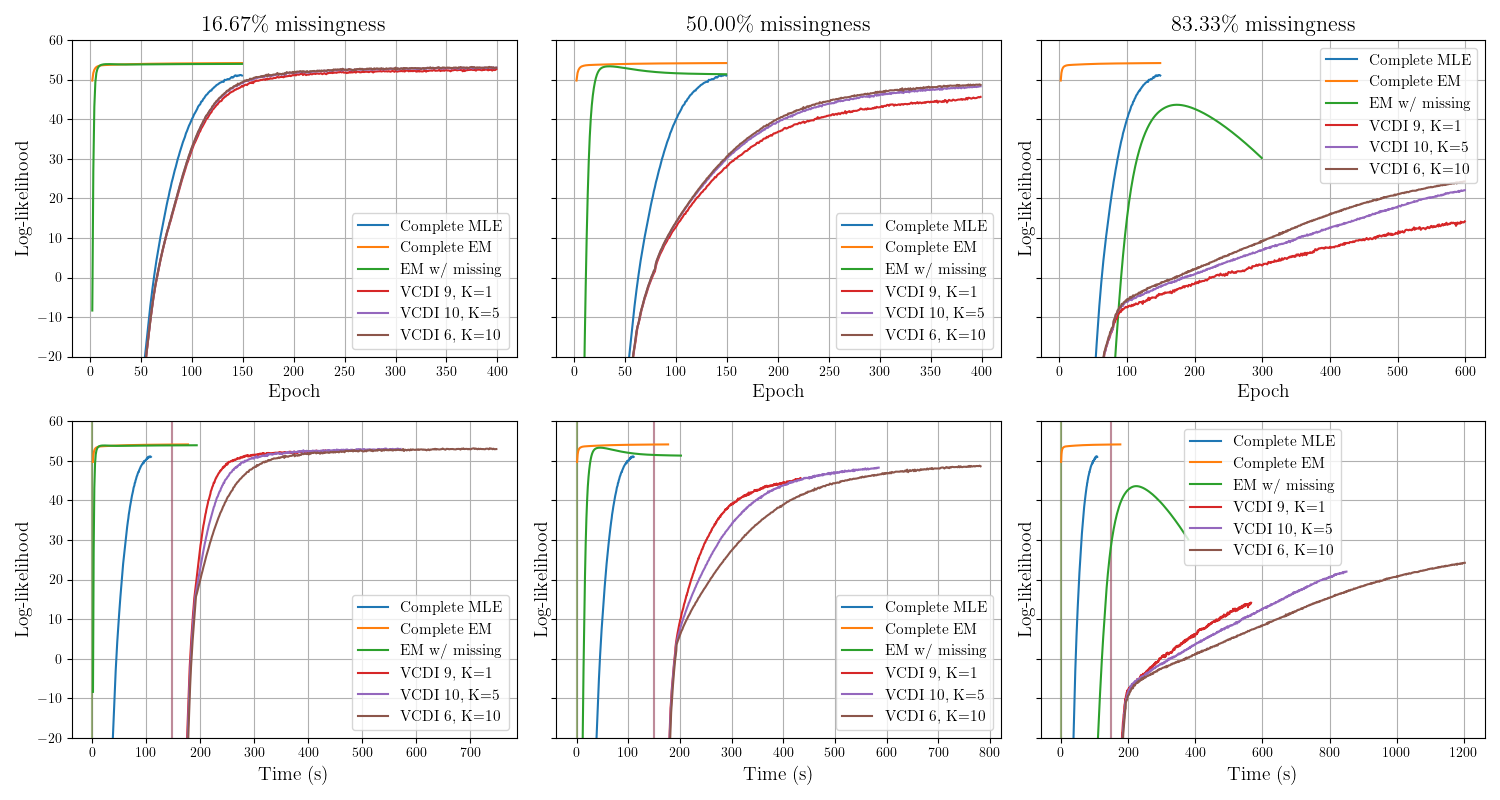

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=True, figsize=(15, 8))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

#     if i in (2, 3):
    xlabel='Epoch'
#     else:
#         xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

for i, g in enumerate(gs, len(gs)):
    stats = read_suite_stats_with_init(group=g, suite=suite, seed=exp_seed_keys[0])
    v_lines = {}
    for exp, metrics in stats.items():
        metrics['train_time'] = np.cumsum(metrics['train_time'])
        if 'init_time' in metrics['init']:
            init_time = np.sum(metrics['init']['init_time'])
            metrics['train_time'] += init_time
            v_lines[exp] = init_time
        else:
            v_lines[exp] = None

#     if i in (2,):
    xlabel = 'Time (s)'
#     else:
#         xlabel = None
#     axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    plot_comparison(axes[i], stats, 
                    x_metric_key='train_time',
                    y_metric_keys=('val_log_lik',),  
                    err_keys=(None, ),
                    v_lines=v_lines,
                    xlabel=xlabel,
                    ylabel='Log-likelihood', 
                    ylim=(-20, 60))


fig.tight_layout()

Increasing K helps, however K can be quite low, increasing K from 5 to 10 helps marginally for 16-50\% missingness, and slightly more so at 83\% missingness. I think this has a larger impact on high-variance densities.

Here are the run times for the above experiments.

| Experiment     | 16\% 400 epochs   | 50\% 400 epochs  | 83\% 600 epochs  |
|----------------|------------------ |------------------|------------------|
| VCDI 9, K=1    | 8min              | 8min             | 11min            |
| VCDI 10, K=5   | 11min             | 12min            | 19min            |
| VCDI 6, K=10   | 17min             | 17min            | 29min            |

Adding more chains, means linear increase in compute time (also in memory). 

In these experiments it would almost seem that increasing K is not very useful, when considering the added cost. However, in the toy dataset, which was very noise, increasing K was useful to converge to a better model. Also, in a multi-modal distribution I would hope that the different chains with larger K would cover more modes than with K=1, for example.

As Michael suggested, we could explore increasing K later in the training. But (1) if we initiate the new chains from the previous chain at K=1, then all of the chains would be in the same mode, (2) if we initiate the new chains randomly, then we should run quite some sampling for those chains so that they are representative of the posterior, otherwise it might pull the model from a good fit.

In [ ]:
y_metrics = ('val_log_lik',)

fig, axes = plt.subplots(nrows=5, ncols=1, sharey=True, figsize=(9, 20))
# axes = [axes]
gs = [1, 2, 3, 4, 5]
for i, g in enumerate(gs):
    stats = read_suite_stats_with_init(group=g, suite=suite, seed=exp_seed_keys[0])
    v_lines = {}
    for exp, metrics in stats.items():
        metrics['train_time'] = np.cumsum(metrics['train_time'])
        if 'init_time' in metrics['init']:
            init_time = np.sum(metrics['init']['init_time'])
            metrics['train_time'] += init_time
            v_lines[exp] = init_time
        else:
            v_lines[exp] = None

    if i in (2,):
        xlabel = 'Time (s)'
    else:
        xlabel = None
    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    plot_comparison(axes[i], stats, 
                    x_metric_key='train_time',
                    y_metric_keys=y_metrics,  
                    err_keys=(None, ),
                    v_lines=v_lines,
                    xlabel=xlabel,
                    ylabel='Log-likelihood', 
                    ylim=(-19.6, -19.1))

axes[0].set_xlim(left=-5, right=355)
axes[1].set_xlim(left=-5, right=355)
axes[2].set_xlim(left=-5, right=355)

fig.tight_layout()

#### Number of Gibbs sampling steps (G)

In [38]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 2': 'fa_pretrained_svar_cdi_2',
#     'VCDI 3': 'fa_pretrained_svar_cdi_3',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
#     'VCDI 6': 'fa_pretrained_svar_cdi_6',
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
#     'VCDI 9': 'fa_pretrained_svar_cdi_9',
    'VCDI 10, G=4': 'fa_pretrained_svar_cdi_10',
    'VCDI 11, G=15': 'fa_pretrained_svar_cdi_11',
    'VCDI 12, G=30': 'fa_pretrained_svar_cdi_12',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24': 'fa_pretrained_svar_cdi_24',
#     'VCDI 25': 'fa_pretrained_svar_cdi_25',
#     'VCDI 26': 'fa_pretrained_svar_cdi_26',
#     'VCDI 27': 'fa_pretrained_svar_cdi_27',
#     'VCDI 28': 'fa_pretrained_svar_cdi_28',
}

<IPython.core.display.Javascript object>


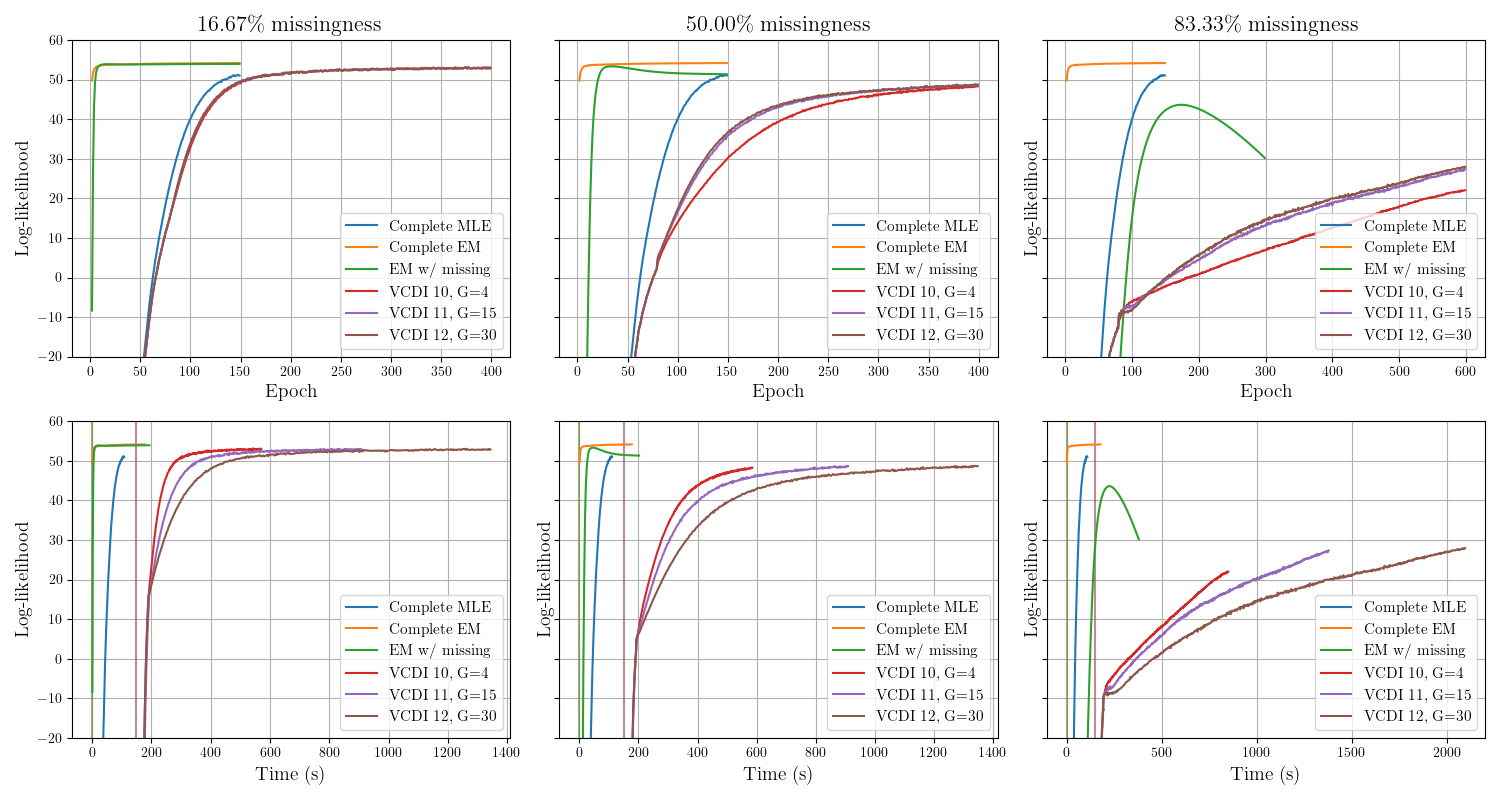

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=True, figsize=(15, 8))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

#     if i in (2, 3):
    xlabel='Epoch'
#     else:
#         xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

for i, g in enumerate(gs, len(gs)):
    stats = read_suite_stats_with_init(group=g, suite=suite, seed=exp_seed_keys[0])
    v_lines = {}
    for exp, metrics in stats.items():
        metrics['train_time'] = np.cumsum(metrics['train_time'])
        if 'init_time' in metrics['init']:
            init_time = np.sum(metrics['init']['init_time'])
            metrics['train_time'] += init_time
            v_lines[exp] = init_time
        else:
            v_lines[exp] = None

#     if i in (2,):
    xlabel = 'Time (s)'
#     else:
#         xlabel = None
#     axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    plot_comparison(axes[i], stats, 
                    x_metric_key='train_time',
                    y_metric_keys=('val_log_lik',),  
                    err_keys=(None, ),
                    v_lines=v_lines,
                    xlabel=xlabel,
                    ylabel='Log-likelihood', 
                    ylim=(-20, 60))

fig.tight_layout()

Increasing number of Gibbs sampler does never hurt in the long run (although in the short run it can hurt a bit, e.g. in 83\% missingness there is a slight decline in the learning curves at G=15 and G=30).
The benefit of increasing $G$ saturates, so there is not point increasing it too much.

Note the choice of $G$ might covary with $K$ (number of chains). 

Here are the run times for the above experiments.

| Experiment     | 16\% 400 epochs   | 50\% 400 epochs  | 83\% 600 epochs  |
|----------------|------------------ |------------------|------------------|
| VCDI 10, G=4   | 11min             | 12min            | 19min            |
| VCDI 11, G=15  | 21min             | 21min            | 34min            |
| VCDI 12, G=30  | 33min             | 33min            | 54min            |

Increasing G has a linear computation time increase (no additional memory).

Increasing G for low missingness here has almost no difference.

#### K and G

In [25]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 2': 'fa_pretrained_svar_cdi_2',
#     'VCDI 3': 'fa_pretrained_svar_cdi_3',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
    
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
    'VCDI 9, K=1, G=4': 'fa_pretrained_svar_cdi_9',
    'VCDI 25, K=1, G=15': 'fa_pretrained_svar_cdi_25',
    'VCDI 26, K=1, G=30': 'fa_pretrained_svar_cdi_26',
    'VCDI 10, K=5, G=4': 'fa_pretrained_svar_cdi_10',
    'VCDI 11, K=5, G=15': 'fa_pretrained_svar_cdi_11',
    'VCDI 12, K=5, G=30': 'fa_pretrained_svar_cdi_12',
    'VCDI 6, K=10, G=4': 'fa_pretrained_svar_cdi_6',
    'VCDI 27, K=10, G=15': 'fa_pretrained_svar_cdi_27',
    'VCDI 28, K=10, G=30': 'fa_pretrained_svar_cdi_28',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24': 'fa_pretrained_svar_cdi_24',
    
}

<IPython.core.display.Javascript object>


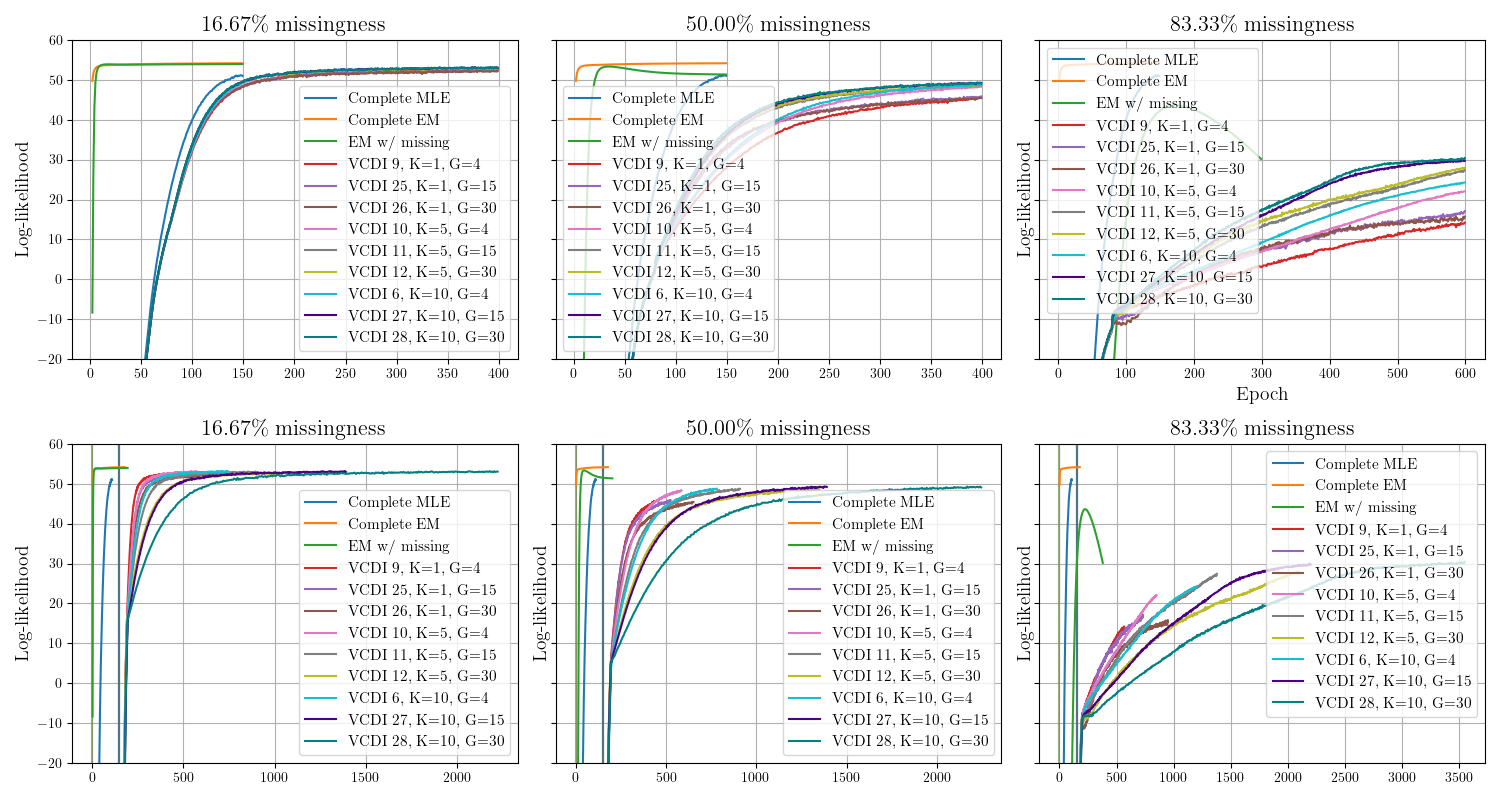

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=True, figsize=(15, 8))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

for i, g in enumerate(gs, len(gs)):
    stats = read_suite_stats_with_init(group=g, suite=suite, seed=exp_seed_keys[0])
    v_lines = {}
    for exp, metrics in stats.items():
        metrics['train_time'] = np.cumsum(metrics['train_time'])
        if 'init_time' in metrics['init']:
            init_time = np.sum(metrics['init']['init_time'])
            metrics['train_time'] += init_time
            v_lines[exp] = init_time
        else:
            v_lines[exp] = None

    if i in (2,):
        xlabel = 'Time (s)'
    else:
        xlabel = None
    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    plot_comparison(axes[i], stats, 
                    x_metric_key='train_time',
                    y_metric_keys=('val_log_lik',),  
                    err_keys=(None, ),
                    v_lines=v_lines,
                    xlabel=xlabel,
                    ylabel='Log-likelihood', 
                    ylim=(-20, 60))

fig.tight_layout()

Here I just plotted the learning curves of the two previous comparisons together, and added a couple of more to see which, K or G has a bigger impact on learning curves.

#### Hogwild Gibbs

In [43]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 2': 'fa_pretrained_svar_cdi_2',
#     'VCDI 3': 'fa_pretrained_svar_cdi_3',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
#     'VCDI 6': 'fa_pretrained_svar_cdi_6',
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
#     'VCDI 9': 'fa_pretrained_svar_cdi_9',
    'VCDI 10, not H, G=4': 'fa_pretrained_svar_cdi_10',
    'VCDI 11, not H, G=15': 'fa_pretrained_svar_cdi_11',
#     'VCDI 12': 'fa_pretrained_svar_cdi_12',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
    'VCDI 15, H=0.1, G=4': 'fa_pretrained_svar_cdi_15',
    'VCDI 16, H=0.2, G=4': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24': 'fa_pretrained_svar_cdi_24',
}

<IPython.core.display.Javascript object>


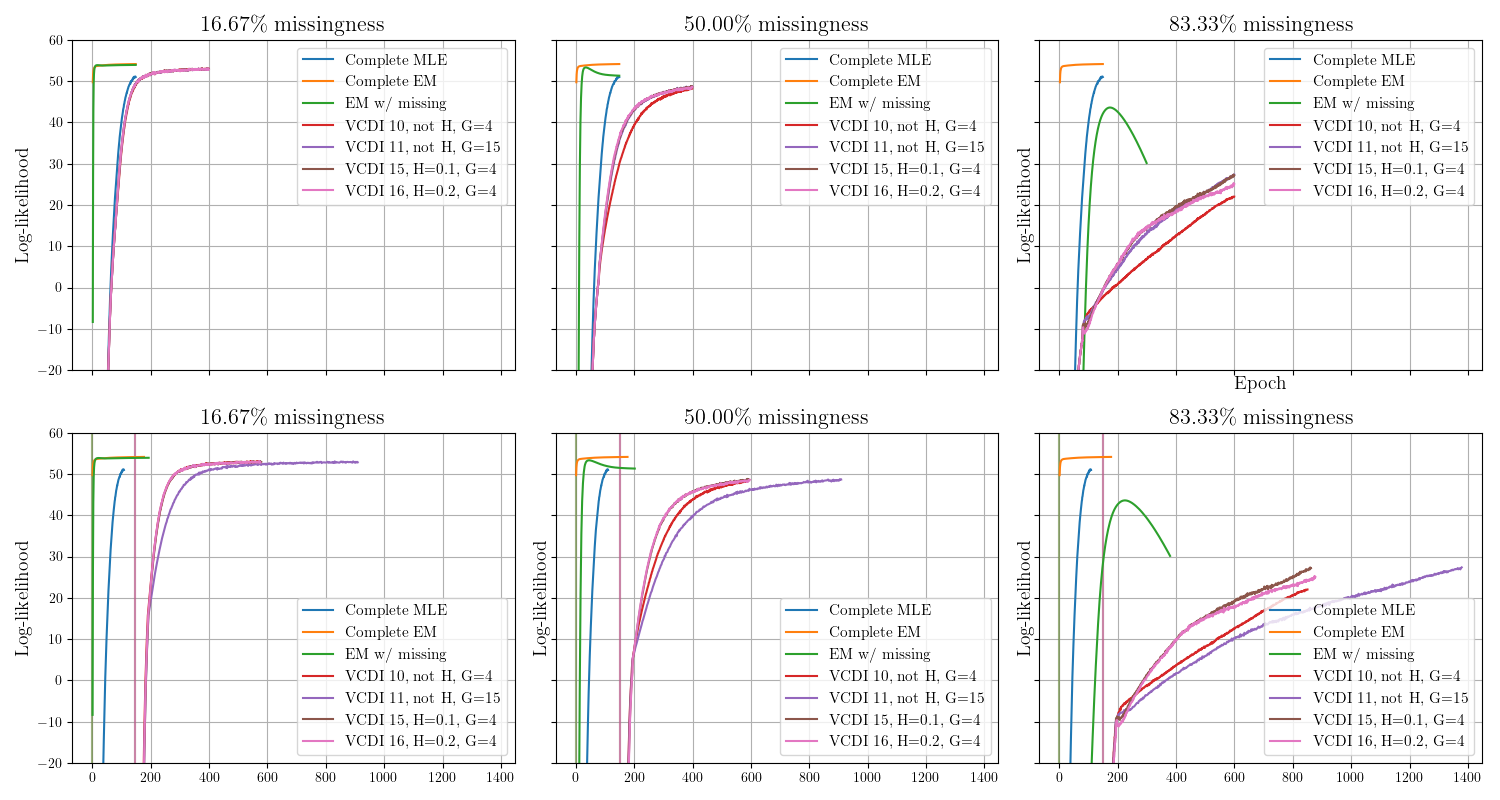

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15, 8))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

for i, g in enumerate(gs, len(gs)):
    stats = read_suite_stats_with_init(group=g, suite=suite, seed=exp_seed_keys[0])
    v_lines = {}
    for exp, metrics in stats.items():
        metrics['train_time'] = np.cumsum(metrics['train_time'])
        if 'init_time' in metrics['init']:
            init_time = np.sum(metrics['init']['init_time'])
            metrics['train_time'] += init_time
            v_lines[exp] = init_time
        else:
            v_lines[exp] = None

    if i in (2,):
        xlabel = 'Time (s)'
    else:
        xlabel = None
    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    plot_comparison(axes[i], stats, 
                    x_metric_key='train_time',
                    y_metric_keys=('val_log_lik',),  
                    err_keys=(None, ),
                    v_lines=v_lines,
                    xlabel=xlabel,
                    ylabel='Log-likelihood', 
                    ylim=(-20, 60))

fig.tight_layout()

Compare Hogwild (Asynchronous) Gibbs sampling vs sequential Gibbs. In the Hogwild Gibbs at each step I choose $H*|m^{(i)}|$ components $x_H^{(i, t)}$ of a sample $x^{(i, t)}$, where $H \in (0, 1]$ denotes the number of missing components we sample in parallel, and then update the sample with the parallel sample:
$$
\tilde x_H^{(i, t+1)} \sim \prod_{j \in \text{idx}(x_H^{(i, t)})} p(x_j \mid x_{\smallsetminus j}^{(i, t)})
$$

Note that VCDI 15 (Hogwild) and VCDI 11 (synchronous Gibbs) both have similar learning curves, however, Hogwild Gibbs is cheaper, since it updates in parallel, rather than sequentially.

However, Hogwild Gibbs does not have convergence guarantees, and can diverge for some distributions!

Run-times:

| Experiment            | 16\% 400 epochs   | 50\% 400 epochs  | 83\% 600 epochs  |
|-----------------------|------------------ |------------------|------------------|
| VCDI 10, not H, G=4   | 11min             | 12min            | 19min            |
| VCDI 11, not H, G=15  | 21min             | 21min            | 34min            |
| VCDI 15, H=0.1, G=4   | 12min             | 12min            | 19min            |
| VCDI 16, H=0.2, G=4   | 12min             | 12min            | 20min            |

Note that Hogwild Gibbs adds almost no additional runtime, but improves the learning curve.



#### Number of components in the VCDI objective expectation (M)

In [68]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 2': 'fa_pretrained_svar_cdi_2',
#     'VCDI 3': 'fa_pretrained_svar_cdi_3',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
#     'VCDI 6': 'fa_pretrained_svar_cdi_6',
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
#     'VCDI 9': 'fa_pretrained_svar_cdi_9',
#     'VCDI 10': 'fa_pretrained_svar_cdi_10',
#     'VCDI 12': 'fa_pretrained_svar_cdi_12',
    'VCDI 13, M=0.1': 'fa_pretrained_svar_cdi_13',
    'VCDI 11, M=0.2': 'fa_pretrained_svar_cdi_11',    
    'VCDI 14, M=0.3': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24': 'fa_pretrained_svar_cdi_24',
}

<IPython.core.display.Javascript object>


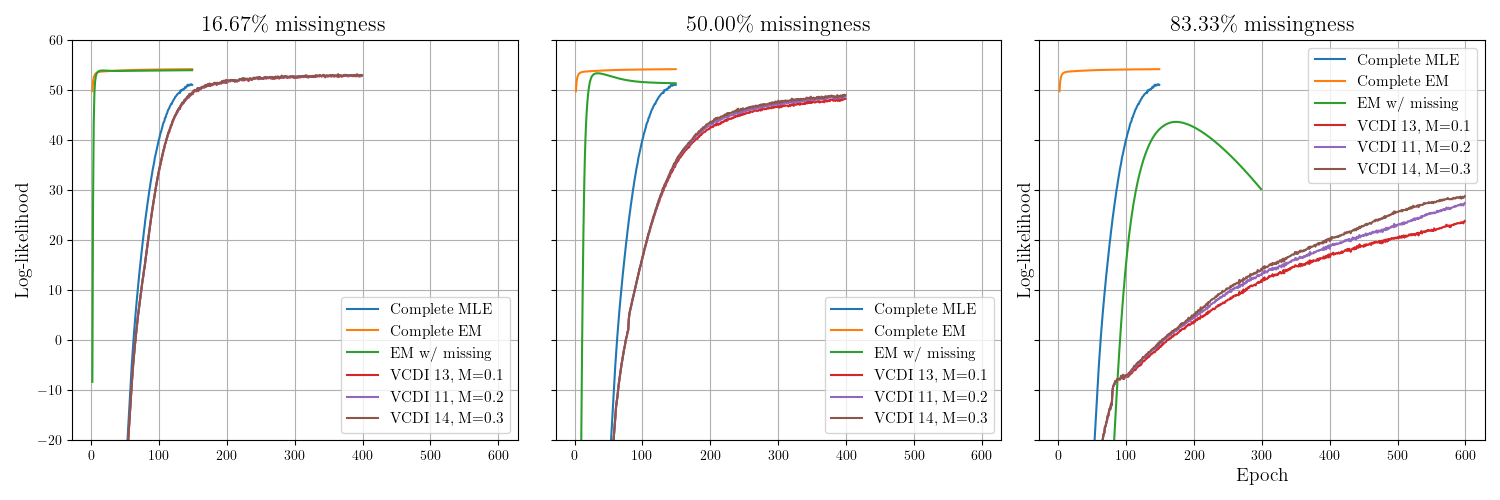

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

# axes[0].set_xlim(left=-5, right=255)
# axes[1].set_xlim(left=-5, right=255)
# axes[2].set_xlim(left=-5, right=255)

fig.tight_layout()

Low M seems to be sufficient, but might be useful for higher missingness.

#### Double ascent in learning curve

In [40]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
#     'VCDI 6': 'fa_pretrained_svar_cdi_6',
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
#     'VCDI 9': 'fa_pretrained_svar_cdi_9',
#     'VCDI 10': 'fa_pretrained_svar_cdi_10',
#     'VCDI 11': 'fa_pretrained_svar_cdi_11',
#     'VCDI 12': 'fa_pretrained_svar_cdi_12',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20, fa\_lr=0.1, var\_lr=0.001, G=4': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
    'VCDI 23, fa\_lr=0.1, var\_lr=0.001': 'fa_pretrained_svar_cdi_23',
    'VCDI 24, fa\_lr=0.1, var\_lr=0.01': 'fa_pretrained_svar_cdi_24',
    'VCDI 2, fa\_lr=0.01, var\_lr=0.01': 'fa_pretrained_svar_cdi_2',
    'VCDI 3, fa\_lr=0.01, var\_lr=0.001': 'fa_pretrained_svar_cdi_3',
}

<IPython.core.display.Javascript object>


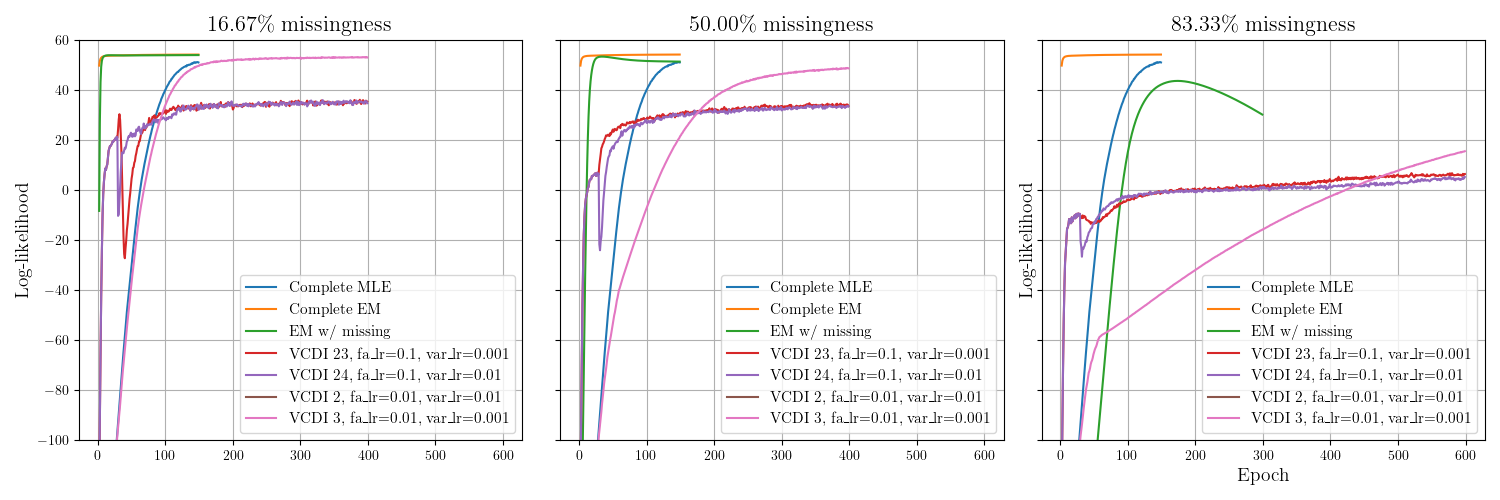

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-100, 60))
#                     ylim=(0, 10))

# axes[0].set_xlim(left=-5, right=255)
# axes[1].set_xlim(left=-5, right=255)
# axes[2].set_xlim(left=-5, right=255)

fig.tight_layout()

Here I note the double-ascent curve behaviour. It happens only when _both_ the density model learning rate and the variational model learning rate is too high. 

In the case where the density model learning rate is too high and var lr is correct/too low, you won't see this behaviour.
In the case where the density model learning rate is correct, but the var learning rate is too high - it crashes. 
So this only leaves the case where FA LR is too high and var LR is also too high - then you observe the huge slump after the var model is started to train.
The "just right" learning rate achieves good overall performance, but is quite slow, so might need learning rate scheduling there.

#### K-scheduling

In [16]:
suite = {
    'Complete MLE': 'fa_complete_data',
    'Complete EM': 'fa_em_complete',
#     'MCEM w/ missing': 'fa_mcem_joint',
    'EM w/ missing': 'fa_em_joint',
#     'VCDI 1': 'fa_pretrained_svar_cdi',
#     'VCDI 2': 'fa_pretrained_svar_cdi_2',
#     'VCDI 3': 'fa_pretrained_svar_cdi_3',
#     'VCDI 4': 'fa_pretrained_svar_cdi_4',
#     'VCDI 5': 'fa_pretrained_svar_cdi_5',
#     'VCDI 6': 'fa_pretrained_svar_cdi_6',
#     'VCDI 7': 'fa_pretrained_svar_cdi_7',
#     'VCDI 8': 'fa_pretrained_svar_cdi_8',
#     'VCDI 9': 'fa_pretrained_svar_cdi_9',
#     'VCDI 10': 'fa_pretrained_svar_cdi_10',
#     'VCDI 11': 'fa_pretrained_svar_cdi_11',
#     'VCDI 12': 'fa_pretrained_svar_cdi_12',
#     'VCDI 13': 'fa_pretrained_svar_cdi_13',
#     'VCDI 14': 'fa_pretrained_svar_cdi_14',
#     'VCDI 15': 'fa_pretrained_svar_cdi_15',
#     'VCDI 16': 'fa_pretrained_svar_cdi_16',
#     'VCDI 17': 'fa_pretrained_svar_cdi_17',
#     'VCDI 18': 'fa_pretrained_svar_cdi_18',
#     'VCDI 19': 'fa_pretrained_svar_cdi_19',
#     'VCDI 20, fa\_lr=0.1, var\_lr=0.001, G=4': 'fa_pretrained_svar_cdi_20',
#     'VCDI 21': 'fa_pretrained_svar_cdi_21',
# #     'VCDI 22': 'fa_pretrained_svar_cdi_22',
#     'VCDI 23, fa\_lr=0.1, var\_lr=0.001': 'fa_pretrained_svar_cdi_23',
#     'VCDI 24, fa\_lr=0.1, var\_lr=0.01': 'fa_pretrained_svar_cdi_24',
    'VCDI 9, K=1': 'fa_pretrained_svar_cdi_9',
    'VCDI 10, K=5': 'fa_pretrained_svar_cdi_10',
    'VCDI 29, K=1,..5(..7), C=100': 'fa_pretrained_svar_cdi_29',
    'VCDI 30, K=1,..5(..7), C=200': 'fa_pretrained_svar_cdi_30',
    'VCDI 31, K=1,..5(..7), C=300': 'fa_pretrained_svar_cdi_31',
}

<IPython.core.display.Javascript object>


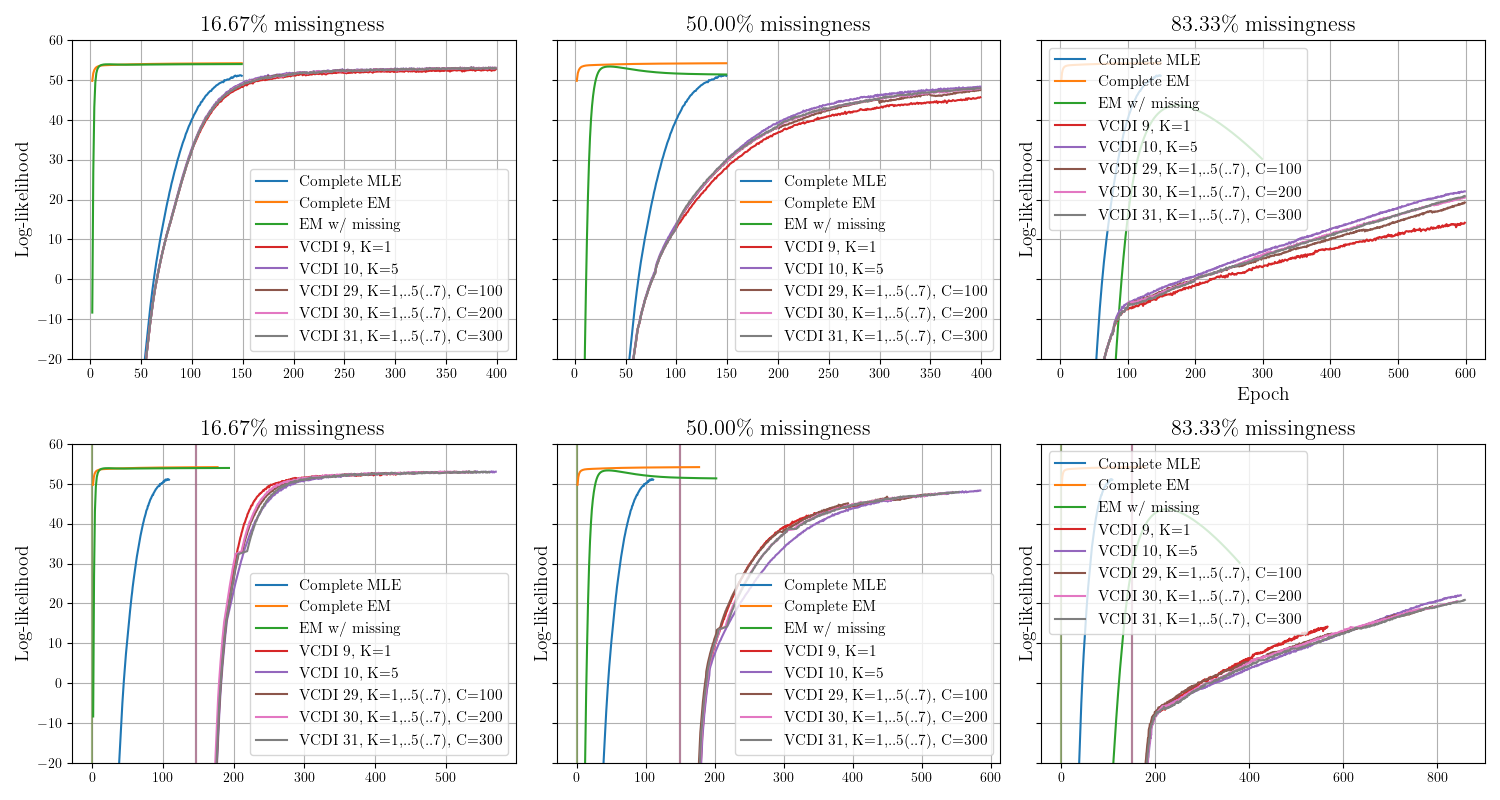

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=True, figsize=(15, 8))
axes = axes.flatten()
# axes = [axes]
gs = [1, 3, 5]
# gs = [3]
for i, g in enumerate(gs):
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')

    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    if i in (0, 2):
        ylabel = 'Log-likelihood'
    else:
        ylabel=None

    if i in (2, 3):
        xlabel='Epoch'
    else:
        xlabel=None
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=('val_log_lik',),
#                     y_metric_keys=('val_loss', ),#'aug_val_loss',),# 'train_loss', 'train_entropy'),
#                     y_metric_keys=('val_log_lik',),  
# #                     y_metric_keys=('train_log_lik', 'train_entropy', 'val_log_lik'),
                    err_keys=(None,),
#                     err_keys=(None, None),
#                     err_keys=(None, None, None, None),
                    xlabel=xlabel,
                    ylabel=ylabel, 
#                     ylim=None)
                    ylim=(-20, 60))
#                     ylim=(0, 10))

for i, g in enumerate(gs, len(gs)):
    stats = read_suite_stats_with_init(group=g, suite=suite, seed=exp_seed_keys[0])
    v_lines = {}
    for exp, metrics in stats.items():
        metrics['train_time'] = np.cumsum(metrics['train_time'])
        if 'init_time' in metrics['init']:
            init_time = np.sum(metrics['init']['init_time'])
            metrics['train_time'] += init_time
            v_lines[exp] = init_time
        else:
            v_lines[exp] = None

    if i in (2,):
        xlabel = 'Time (s)'
    else:
        xlabel = None
    axes[i].set_title(label=f'{g/6*100:.2f}\% missingness', fontdict={'fontsize': 16})
    plot_comparison(axes[i], stats, 
                    x_metric_key='train_time',
                    y_metric_keys=('val_log_lik',),  
                    err_keys=(None, ),
                    v_lines=v_lines,
                    xlabel=xlabel,
                    ylabel='Log-likelihood', 
                    ylim=(-20, 60))

fig.tight_layout()

### Var. model pretraining learning curve

In [22]:
suite = {
    'Shared Var': 'svar_pretraining',
}

<IPython.core.display.Javascript object>


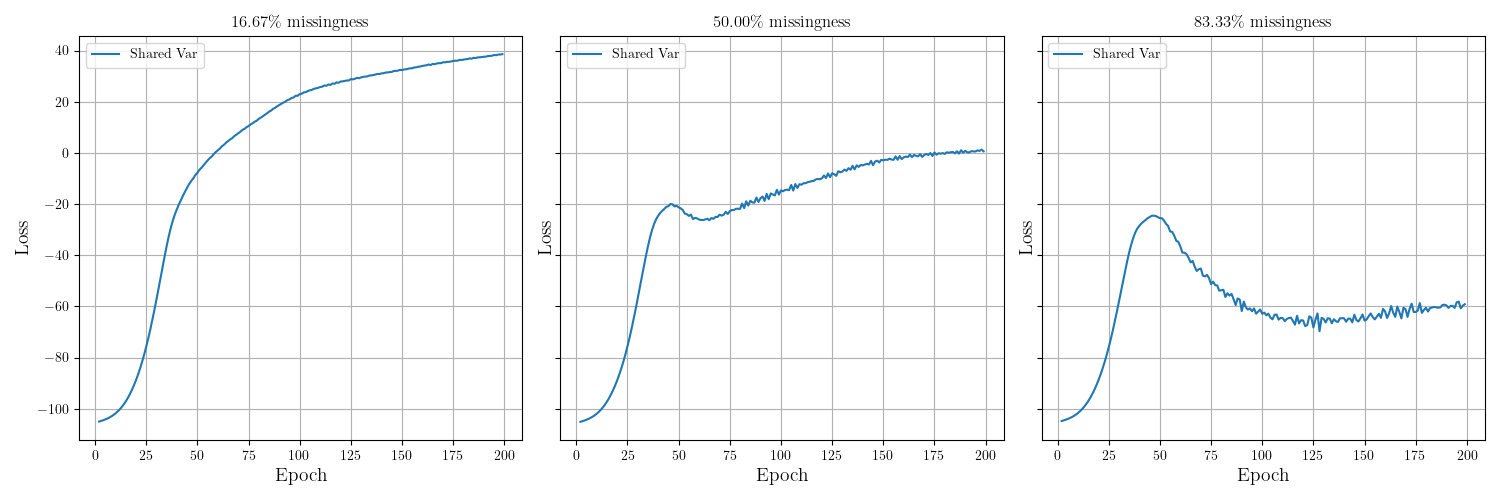

In [24]:
y_metrics = ('val_log_lik',#)
            'val_log_lik_0',
            'val_log_lik_1',
            'val_log_lik_2',
            'val_log_lik_3',
            'val_log_lik_4',
            'val_log_lik_5')
err_metrics = (None, None, None, None, None, None, None)
# metric_labels = ('log\_lik',#)
#                  'log\_lik dim(0)',
#                  'log\_lik dim(1)',
#                  'log\_lik dim(2)',
#                  'log\_lik dim(3)',
#                  'log\_lik dim(4)',
#                  'log\_lik dim(5)',)
metric_labels = None

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
# axes = [axes]
gs = [1, 3, 5]
for i, g in enumerate(gs):
    axes[i].set(title=f'{g/6*100:.2f}\% missingness')
    stats = read_suite_stats(group=g, suite=suite, seed=exp_seed_keys[0], filename='summary.csv')
    
    plot_comparison(axes[i], stats, 
                    x_metric_key='curr_epoch',
                    y_metric_keys=y_metrics,  
                    err_keys=err_metrics,
                    metric_labels=metric_labels,
                    xlabel='Epoch',
                    ylabel='Loss', 
                    ylim=None,
                    colors_instead_styles=False)

    axes[i].legend(loc='upper left')

fig.tight_layout()